# Investment Strategies Comparison

This notebook explores a comparison between two common investment strategies:

- __Lump Sum Investing__: Investing a large sum of money at once.
- __Cost Averaging__: Spreading a sum of money over time to try to reduce risk of possible adverse market changes.


In [1]:
from get_data import get_data
from strategies import lump_buy, cost_average
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

## Initial comparison of strategies

In [2]:
to_invest = 10_000
duration = 365*10 # days
frequency = 7 # days

ticker = "AAPL"

start = "02/06/2012"
end = "02/06/2022"

fractional = True

data = get_data(ticker, date_from=start, date_to=end, granularity="day", save=False)

Filtering existing data...


In [3]:
lump = lump_buy(data,start,end,value=to_invest, fractional_stocks=fractional)
lump.tail()

,date,cost,cum_cost,cum_quantity,current_total_value
2512,2022-05-26,140.584991,10000.0,497.512476,69942.789062
2513,2022-05-27,147.514999,10000.0,497.512476,73390.554688
2514,2022-05-31,148.955002,10000.0,497.512476,74106.968750
2515,2022-06-01,149.304993,10000.0,497.512476,74281.093750
2516,2022-06-02,149.169998,10000.0,497.512476,74213.937500


In [4]:
sub_inv_val = to_invest/(duration/frequency)
print(sub_inv_val)
ca = cost_average(data,start,end,frequency,value=sub_inv_val, fractional_stocks=fractional)
ca.tail()

19.17808219178082


,date,cost,cum_quantity,cum_cost,current_total_value
2512,2022-05-26,140.584991,290.657786,9953.424658,40862.122406
2513,2022-05-27,147.514999,290.657786,9953.424658,42876.383172
2514,2022-05-31,148.955002,290.657786,9953.424658,43294.931094
2515,2022-06-01,149.304993,290.657786,9953.424658,43396.658658
2516,2022-06-02,149.169998,290.657786,9953.424658,43357.421453


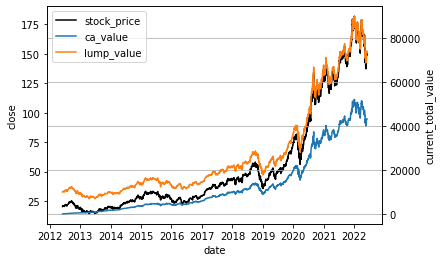

In [5]:
# Plot stock price
ax1 = sns.lineplot(x=data["date"],y=data["close"],color="black")

# Plot cost-avg and lump on second y-axis
ax2 = plt.twinx()
sns.lineplot(x=ca["date"],y=ca["current_total_value"],ax=ax2)
sns.lineplot(x=lump["date"],y=lump["current_total_value"],ax=ax2)

plt.legend(
	[*list(ax1.lines),*list(ax2.lines)],
	["stock_price","ca_value","lump_value"]
)
plt.grid(visible=True,axis="both")

Over a 10 year period, investing the whole amount immediately gives, as expected, better returns than spreading the investment evenly throughout the period.